In [1]:
#import sklearn
#from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
ds=pd.read_csv('empl.csv')

In [24]:
ds.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [25]:
ds.tail()

,SNo,Name,Age,City,Country,Salary
17,19,Lee,31.0,Edmonto,Canada,NaN
18,20,Andrew,34.0,Congo,Africa,34432.0
19,21,soham,32.0,Angola,Africa,34534.0
20,22,Grig,26.0,Finland,Europe,33451.0
21,23,Kiara,27.0,London,Europe,NaN


In [26]:
ds.sample()

,SNo,Name,Age,City,Country,Salary
1,2,Lee,31.0,Edmonto,Canada,3900.0


In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SNo      22 non-null     int64  
 1   Name     22 non-null     object 
 2   Age      19 non-null     float64
 3   City     19 non-null     object 
 4   Country  22 non-null     object 
 5   Salary   19 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


In [28]:
ds.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [29]:
ds.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


<AxesSubplot:>

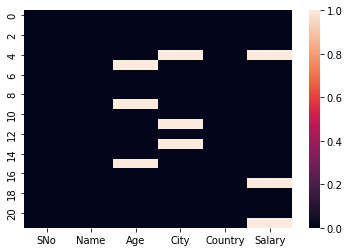

In [32]:
sns.heatmap(ds.isnull())

In [35]:
ds.drop(['Name'],axis=1,inplace=True)

In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SNo      22 non-null     int64  
 1   Age      19 non-null     float64
 2   City     19 non-null     object 
 3   Country  22 non-null     object 
 4   Salary   19 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1008.0+ bytes


In [37]:
ds.isnull().sum()

SNo        0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [38]:
# df.dropna(axis=0,inplace=True) #we drop the row we will loose many data
#df
#!pip install sklearn-pandas
#sklear-pandas has CategoricalImputer

In [39]:
# for int,float , int64,float64

#ds['age']=ds['age'].fillna((ds['age'].median()))
#ds['age']=ds['age'].fillna((ds['age'].mean()))


# for string or object data

#ds['city']=ds['city'].fillna((ds['city'].mode()))


In [40]:
# replace times with mode in str, (median, mean for int or float value)

#ds=ds.replace(np.NaN,ds['salary'].mean())
#ds=ds.replace(0 or -1 as per ur requirement,ds['salary'].mean())



In [43]:
from sklearn.impute import SimpleImputer

# instance of Simple Imputer 
# finding mean
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

In [45]:
ds['Age']=imp.fit_transform(ds['Age'].values.reshape(-1,1))

In [46]:
ds['Salary']=imp.fit_transform(ds['Salary'].values.reshape(-1,1))

In [47]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SNo      22 non-null     int64  
 1   Age      22 non-null     float64
 2   City     19 non-null     object 
 3   Country  22 non-null     object 
 4   Salary   22 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1008.0+ bytes


In [48]:
ds.isnull().sum()

SNo        0
Age        0
City       3
Country    0
Salary     0
dtype: int64

In [49]:
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [51]:
ds['City']=imp.fit_transform(ds['City'].values.reshape(-1,1))

In [52]:
ds.isnull().sum()

SNo        0
Age        0
City       0
Country    0
Salary     0
dtype: int64

<AxesSubplot:>

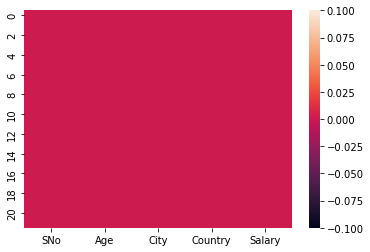

In [53]:
sns.heatmap(ds.isnull())

In [54]:
ds.head()

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.000000
1,2,31.0,Edmonto,Canada,3900.000000
2,3,34.0,Toronto,Canada,8000.000000
3,4,26.0,HongKong,Asia,66672.000000
4,5,30.0,HongKong,America,33739.947368


In [65]:
# calling label Encoder as instance le
le=LabelEncoder()
# df['City']=le.fit_transform(df['City']) # we can write individual

#get dummies process can be used

#city_dummies=pd_dummies(df.City)
#city_dummies------> 
#dummy items it will create many columns one holding value will be 1 other will be 0


list1=['City','Country']

for val in list1:
    
    ds[val]=le.fit_transform(ds[val].astype(str)) 
    # as type is added to change the data to string
    

In [66]:
ds.head()

,SNo,Age,City,Country,Salary
0,1,28.0,8,3,20000.000000
1,2,31.0,3,3,3900.000000
2,3,34.0,8,3,8000.000000
3,4,26.0,5,2,66672.000000
4,5,30.0,5,1,33739.947368
